# Bank Series

We will propose a relevant and exhaustive market risk analysis of a Bank. The bank is **JP Morgan**

## Import Libraries

In [306]:
import yfinance as yf
import pandas as pd
import numpy as np
import Series_Functions as sf
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = [15, 8]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Donwload the data

In [307]:
ticker = 'JPM'
prices = sf.get_data(ticker)

We compute the returns

In [308]:
returns = sf.get_returns(prices)

In [309]:
returns.mean()

0.0006999274969912326

We plot the returns for the bank

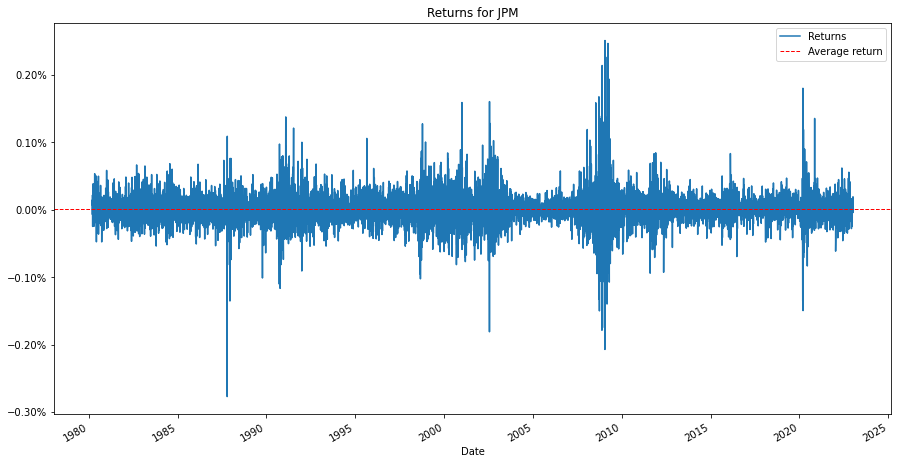

In [310]:
sf.plot_returns(returns, ticker)

## Estimation of the VaR

Qu'est ce que la **VaR** : Une mesure de la perte maximale potentielle sur une période de temps donnée avec une certaine probabilité.

### Non parametric method

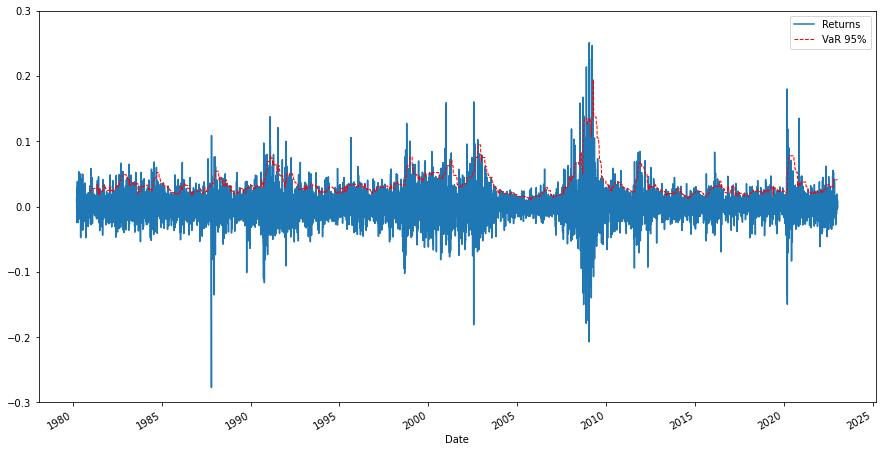

In [311]:
VaR_NonParam = sf.weighted_hs_var(returns=returns, confidence_level=95, window=100)

### Parametric method